# Importing packages

In [1]:
# The basics
import numpy as np
import pandas as pd

# Cross validation and model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.multioutput import RegressorChain

# Plotting
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker
import matplotlib.pylab as pl

# Looping
import itertools

# Helper functions

### Actual vs. Predicted plotter function

In [2]:
def plot_actual_vs_pred(actual, pred, title, info):
    
    # Gasses
    gasses = ['NO', 'NO_2', 'NH_3']
    
    # Getting axis limits to have uniform plots for all gasses
    axis_min = pred.min()
    axis_max = pred.max()
    
    print(axis_min)
    print(axis_max)
    
    # Dividing into 3 subplots
    fig, axs = plt.subplots(1,3, figsize=(30,10), dpi = 300)
    
    # Main title
    fig.suptitle(title, fontsize=35)
    
     # Axis params
    plt.xticks(rotation=45)
    
    
    for i, ax in enumerate(axs.flat):
        
        # Data
        ax.scatter(actual[:,i], pred[:,i], c='black', alpha = 0.4)
        
        # Identity line y=x
        line = mlines.Line2D([0, 1], [0, 1], color='red')
        transform = ax.transAxes
        line.set_transform(transform)
        ax.add_line(line)
        
        # Text box with information of the fit
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.6)
        textstr = info
        ax.text(0.05, 0.95,
                textstr,
                transform = ax.transAxes,
                fontsize = 20,
                verticalalignment = 'top',
                bbox = props,
                fontname = 'Helvetica'
               )
        
        # Plot title and axis names
        ax.set_title(f'${gasses[i]}$', fontname = 'Helvetica', fontsize = 30)
        ax.set_ylabel('Predicted (ppm)', fontname = 'Helvetica', fontsize = 25)
        ax.set_xlabel('Actual (ppm)', fontname = 'Helvetica', fontsize = 25)
        
        # Setting axis limits (defined above)
        if axis_min >0 or axis_max < 80:
            ax.set_xlim(-5, 85)
            ax.set_ylim(-5, 85)
        else:
            ax.set_xlim(axis_min + 5, axis_max + 5)
            ax.set_ylim(axis_min + 5, axis_max + 5)
        
        # Setting minor ticks in fixed levels (5, 10, 20, 40, 80)
        ax.xaxis.set_minor_locator(ticker.FixedLocator([5,10,20,40,80]))
        ax.yaxis.set_minor_locator(ticker.FixedLocator([5,10,20,40,80]))
        
        # Major tick style
        ax.grid(linestyle='-', linewidth=0.5)
        ax.tick_params(axis='x', which='major', labelsize=20, rotation = 45)
        # Font size of tick labels (numbers)
        ax.tick_params(axis='both', which='major', labelsize=20)
        
        # Minor tick style
        ax.grid(axis = 'x', which = 'minor',linestyle=':', linewidth=0.5,color = "fuchsia")
        ax.tick_params(which = 'minor', axis="x", direction="in",
                       length=10, width=3, color="fuchsia", rotation = 45, labelsize = 12)
        ax.xaxis.set_minor_formatter('{x:.0f}')
        
        
    
    plt.show()

### Plot features through time

In [3]:
def plot_features(data):
    #ax = ax
    mixes = list(itertools.product([5,10,20,40,80],repeat = 3)) # 125
    n_mix = len(mixes) # 125 unique gas mixtures
    n_features = 240 # 240 slopes and 240 avgs

    # Plotting colormap
    colors = pl.cm.jet(np.linspace(0,1,n_mix))
    normalized = True

    for mix, i  in zip(mixes, range(n_mix)):
        maskNO = data['NO'] == mix[0]
        maskNO2 = data['NO2'] == mix[1]
        maskNH3 = data['NH3'] == mix[2]
        masked = data[(maskNO) & (maskNO2) & (maskNH3)]

        avg_feature = masked.mean(axis = 0)[3:]
        plt.plot(range(n_features), avg_feature, color = colors[i], lw = 1)
        
def plot_features_subplot(data, scaled_data, title, yaxis):

    # Dividing into 2 subplots
    fig = plt.figure(figsize = (20,10), dpi = 200)
    fig.subplots_adjust(hspace=.5)
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212) 

    # Main title
    fig.suptitle(title, fontsize=35, fontname = 'Helvetica')

    # Un-normalized
    ax1.set_title('Un-normalized', fontsize = 30, fontname = 'Helvetica')
    ax1.set_xlabel('Index', fontsize = 25, fontname = 'Helvetica')
    ax1.set_ylabel(yaxis, fontsize = 25, fontname = 'Helvetica')

    # Un-normalized
    ax2.set_title('Normalized', fontsize = 30, fontname = 'Helvetica')
    ax2.set_xlabel('Index', fontsize = 25, fontname = 'Helvetica')
    ax2.set_ylabel(yaxis, fontsize = 25, fontname = 'Helvetica')

    # Major tick style
    ax1.grid(linestyle='-', linewidth=1)
    ax1.tick_params(axis='x', which='major', labelsize=20)
    # Font size of tick labels (numbers)
    ax1.tick_params(axis='both', which='major', labelsize=20)

    # Major tick style
    ax2.grid(linestyle='-', linewidth=1)
    ax2.tick_params(axis='x', which='major', labelsize=20)
    # Font size of tick labels (numbers)
    ax2.tick_params(axis='both', which='major', labelsize=20)


    plt.subplot(2, 1, 1)
    plot_features(data)

    plt.subplot(2, 1, 2)
    plot_features(scaled_data)
    plt.show()
    

# Reading data

**Note**: Refer to `real_data.ipynb` to check preprocessing steps.

In [4]:
sensor = pd.read_csv('../../data/sensor2.csv')

In [5]:
sensor.head(10)

exposure    NO   NO2   NH3  0.05-1-slope-0  0.05-1-slope-1  0.05-1-slope-2  \
0       1.0  10.0   5.0  20.0      -22.588416      -28.185027       -0.482129   
1       1.0  10.0   5.0  20.0      -39.019909       -9.961837       -0.495160   
2       1.0  10.0   5.0  20.0      -33.573149      -15.193593       -0.273641   
3       1.0  10.0   5.0  20.0      -40.199171       -8.691361       -0.325763   
4       2.0  20.0  40.0  40.0      -23.546159      -26.825509       -0.447381   
5       2.0  20.0  40.0  40.0      -33.775122      -15.284807       -0.169397   
6       2.0  20.0  40.0  40.0      -36.952398      -12.140107       -0.371370   
7       2.0  20.0  40.0  40.0      -36.980632      -12.105358       -0.351824   
8       3.0  40.0  40.0  80.0      -24.041319      -26.556211       -0.351824   
9       3.0  40.0  40.0  80.0      -39.287035       -9.877138       -0.534251   

   0.05-1-slope-3  0.05-1-slope-4  0.05-1-slope-5  ...  2500.0-1-avg-230  \
0       -0.156366       -0.247580       -0.039092  ...         33.580968   
1       -0.130305       -0.114017       -0.094471  ...         33.815517   
2       -0.234549       -0.078183       -0.117275  ...         33.904559   
3       -0.039092       -0.299702       -0.091214  ...         33.981656   
4       -0.247580       -0.377885       -0.034748  ...         33.538619   
5       -0.286672       -0.065153       -0.026061  ...         33.460435   
6       -0.234549       -0.091214       -0.078183  ...         33.473466   
7       -0.169397       -0.104244       -0.104244  ...         33.466951   
8       -0.312733       -0.156366       -0.117275  ...         33.444147   
9        0.078183       -0.143336       -0.130305  ...         33.466951   

   2500.0-1-avg-231  5000.0-1-avg-232  5000.0-1-avg-233  5000.0-1-avg-234  \
0         33.587483         33.815517         33.877412         33.861124   
1         33.835063         34.020748         34.059839         34.105446   
2         33.929534         34.131507         34.199918         34.206433   
3         34.024006         34.199918         34.268328         34.235752   
4         33.554907         33.711273         33.802487         33.799229   
5         33.467494         33.690098         33.756880         33.747107   
6         33.460435         33.665666         33.711273         33.738963   
7         33.450662         33.636347         33.724303         33.730819   
8         33.431117         33.620059         33.668924         33.698242   
9         33.445776         33.587483         33.701500         33.694985   

   5000.0-1-avg-235  5000.0-1-avg-236  5000.0-1-avg-237  5000.0-1-avg-238  \
0         33.861124         33.838321         33.854609         33.844836   
1         34.072870         34.059839         34.066355         34.072870   
2         34.193402         34.180372         34.193402         34.180372   
3         34.245524         34.252040         34.252040         34.258555   
4         33.763395         33.763395         33.760137         33.786198   
5         33.734076         33.701500         33.727561         33.708015   
6         33.714531         33.701500         33.704758         33.714531   
7         33.704758         33.708015         33.730819         33.711273   
8         33.708015         33.681954         33.688470         33.691727   
9         33.704758         33.701500         33.678697         33.653450   

   5000.0-1-avg-239  
0         33.867639  
1         34.048438  
2         34.209691  
3         34.287874  
4         33.756880  
5         33.730819  
6         33.685212  
7         33.711273  
8         33.685212  
9         33.708015  

[10 rows x 484 columns]

In [6]:
# Dependent Variables - gas concentrations
y = np.asarray(sensor.iloc[:, :4])

# Independent variables - shape features
X = np.asarray(sensor.iloc[:, 4:])

In [7]:
# Scaling data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X)
y = pd.DataFrame(y)
scaled = pd.concat((y, scaled_X), axis = 1)
colnames = sensor.columns
scaled.columns = colnames

In [8]:
scaled.head(10)

exposure    NO   NO2   NH3  0.05-1-slope-0  0.05-1-slope-1  0.05-1-slope-2  \
0       1.0  10.0   5.0  20.0        2.033884       -2.024181       -1.491787   
1       1.0  10.0   5.0  20.0       -0.661288        0.869532       -1.613034   
2       1.0  10.0   5.0  20.0        0.232116        0.038766        0.448171   
3       1.0  10.0   5.0  20.0       -0.854716        1.071274       -0.036819   
4       2.0  20.0  40.0  40.0        1.876790       -1.808299       -1.168460   
5       2.0  20.0  40.0  40.0        0.198987        0.024282        1.418149   
6       2.0  20.0  40.0  40.0       -0.322165        0.523638       -0.461184   
7       2.0  20.0  40.0  40.0       -0.326796        0.529156       -0.279313   
8       3.0  40.0  40.0  80.0        1.795572       -1.765537       -0.279313   
9       3.0  40.0  40.0  80.0       -0.705103        0.882981       -1.976776   

   0.05-1-slope-3  0.05-1-slope-4  0.05-1-slope-5  ...  2500.0-1-avg-230  \
0        0.008906       -1.663958        0.523062  ...          2.237116   
1        0.294908       -0.053896       -0.157638  ...          2.491954   
2       -0.849101        0.378072       -0.437926  ...          2.588698   
3        1.295916       -2.292275       -0.117596  ...          2.672464   
4       -0.992102       -3.234751        0.576450  ...          2.191104   
5       -1.421105        0.535152        0.683227  ...          2.106158   
6       -0.849101        0.220993        0.042568  ...          2.120315   
7       -0.134095        0.063914       -0.277761  ...          2.113237   
8       -1.707107       -0.564403       -0.437926  ...          2.088461   
9        2.582925       -0.407324       -0.598090  ...          2.113237   

   2500.0-1-avg-231  5000.0-1-avg-232  5000.0-1-avg-233  5000.0-1-avg-234  \
0          2.250681          2.286884          2.286337          2.272227   
1          2.519748          2.509506          2.483717          2.536242   
2          2.622419          2.629652          2.635277          2.645369   
3          2.725089          2.703859          2.709294          2.677050   
4          2.215277          2.173806          2.205270          2.205343   
5          2.120278          2.150837          2.155925          2.149020   
6          2.112607          2.124334          2.106580          2.140220   
7          2.101986          2.092531          2.120679          2.131419   
8          2.080744          2.074862          2.060760          2.096217   
9          2.096675          2.039525          2.096006          2.092697   

   5000.0-1-avg-235  5000.0-1-avg-236  5000.0-1-avg-237  5000.0-1-avg-238  \
0          2.278346          2.260119          2.282564          2.276652   
1          2.506909          2.499037          2.510810          2.522155   
2          2.637014          2.629036          2.647757          2.637892   
3          2.693276          2.706333          2.710963          2.722064   
4          2.172855          2.179309          2.180732          2.213523   
5          2.141208          2.112553          2.145617          2.129351   
6          2.120110          2.112553          2.121037          2.136365   
7          2.109561          2.119580          2.149129          2.132858   
8          2.113077          2.091472          2.103480          2.111815   
9          2.109561          2.112553          2.092945          2.070606   

   5000.0-1-avg-239  
0          2.301890  
1          2.496103  
2          2.669321  
3          2.753305  
4          2.182912  
5          2.154917  
6          2.105926  
7          2.133921  
8          2.105926  
9          2.130422  

[10 rows x 484 columns]

In [9]:
print(scaled.iloc[1495:, [0,1,2,3,4,5,243,244,245,246,482,483]].to_latex(caption = 'Sample of raw data.',
                           label = 'tab:raw-sample', 
                           column_format='cp{0.8cm}p{0.8cm}p{0.8cm}p{0.8cm}p{1.8cm}p{1.5cm}p{1.5cm}p{1.5cm}p{1.5cm}p{1.5cm}p{1.5cm}p{1.5cm}'))

\begin{table}
\centering
\caption{Sample of raw data.}
\label{tab:raw-sample}
\begin{tabular}{cp{0.8cm}p{0.8cm}p{0.8cm}p{0.8cm}p{1.8cm}p{1.5cm}p{1.5cm}p{1.5cm}p{1.5cm}p{1.5cm}p{1.5cm}p{1.5cm}}
\toprule
{} &  exposure &    NO &   NO2 &   NH3 &  0.05-1-slope-0 &  0.05-1-slope-1 &  5000.0-1-slope-239 &  0.05-1-avg-0 &  0.05-1-avg-1 &  0.05-1-avg-2 &  5000.0-1-avg-238 &  5000.0-1-avg-239 \\
\midrule
1495 &     374.0 &  80.0 &  80.0 &  40.0 &       -0.429032 &        0.485703 &           -0.725205 &     -1.122473 &     -1.365005 &     -1.369615 &         -1.476030 &         -1.490233 \\
1496 &     375.0 &  20.0 &  80.0 &   5.0 &        1.083129 &       -1.205831 &           -1.426065 &      0.366557 &     -1.232375 &     -1.238876 &         -1.479537 &         -1.510646 \\
1497 &     375.0 &  20.0 &  80.0 &   5.0 &       -0.635640 &        0.696067 &            0.507342 &     -1.303357 &     -1.373294 &     -1.352369 &         -1.461417 &         -1.445908 \\
1498 &     375.0 &  20.0 &  80.

/Users/cosmo/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/cosmo/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


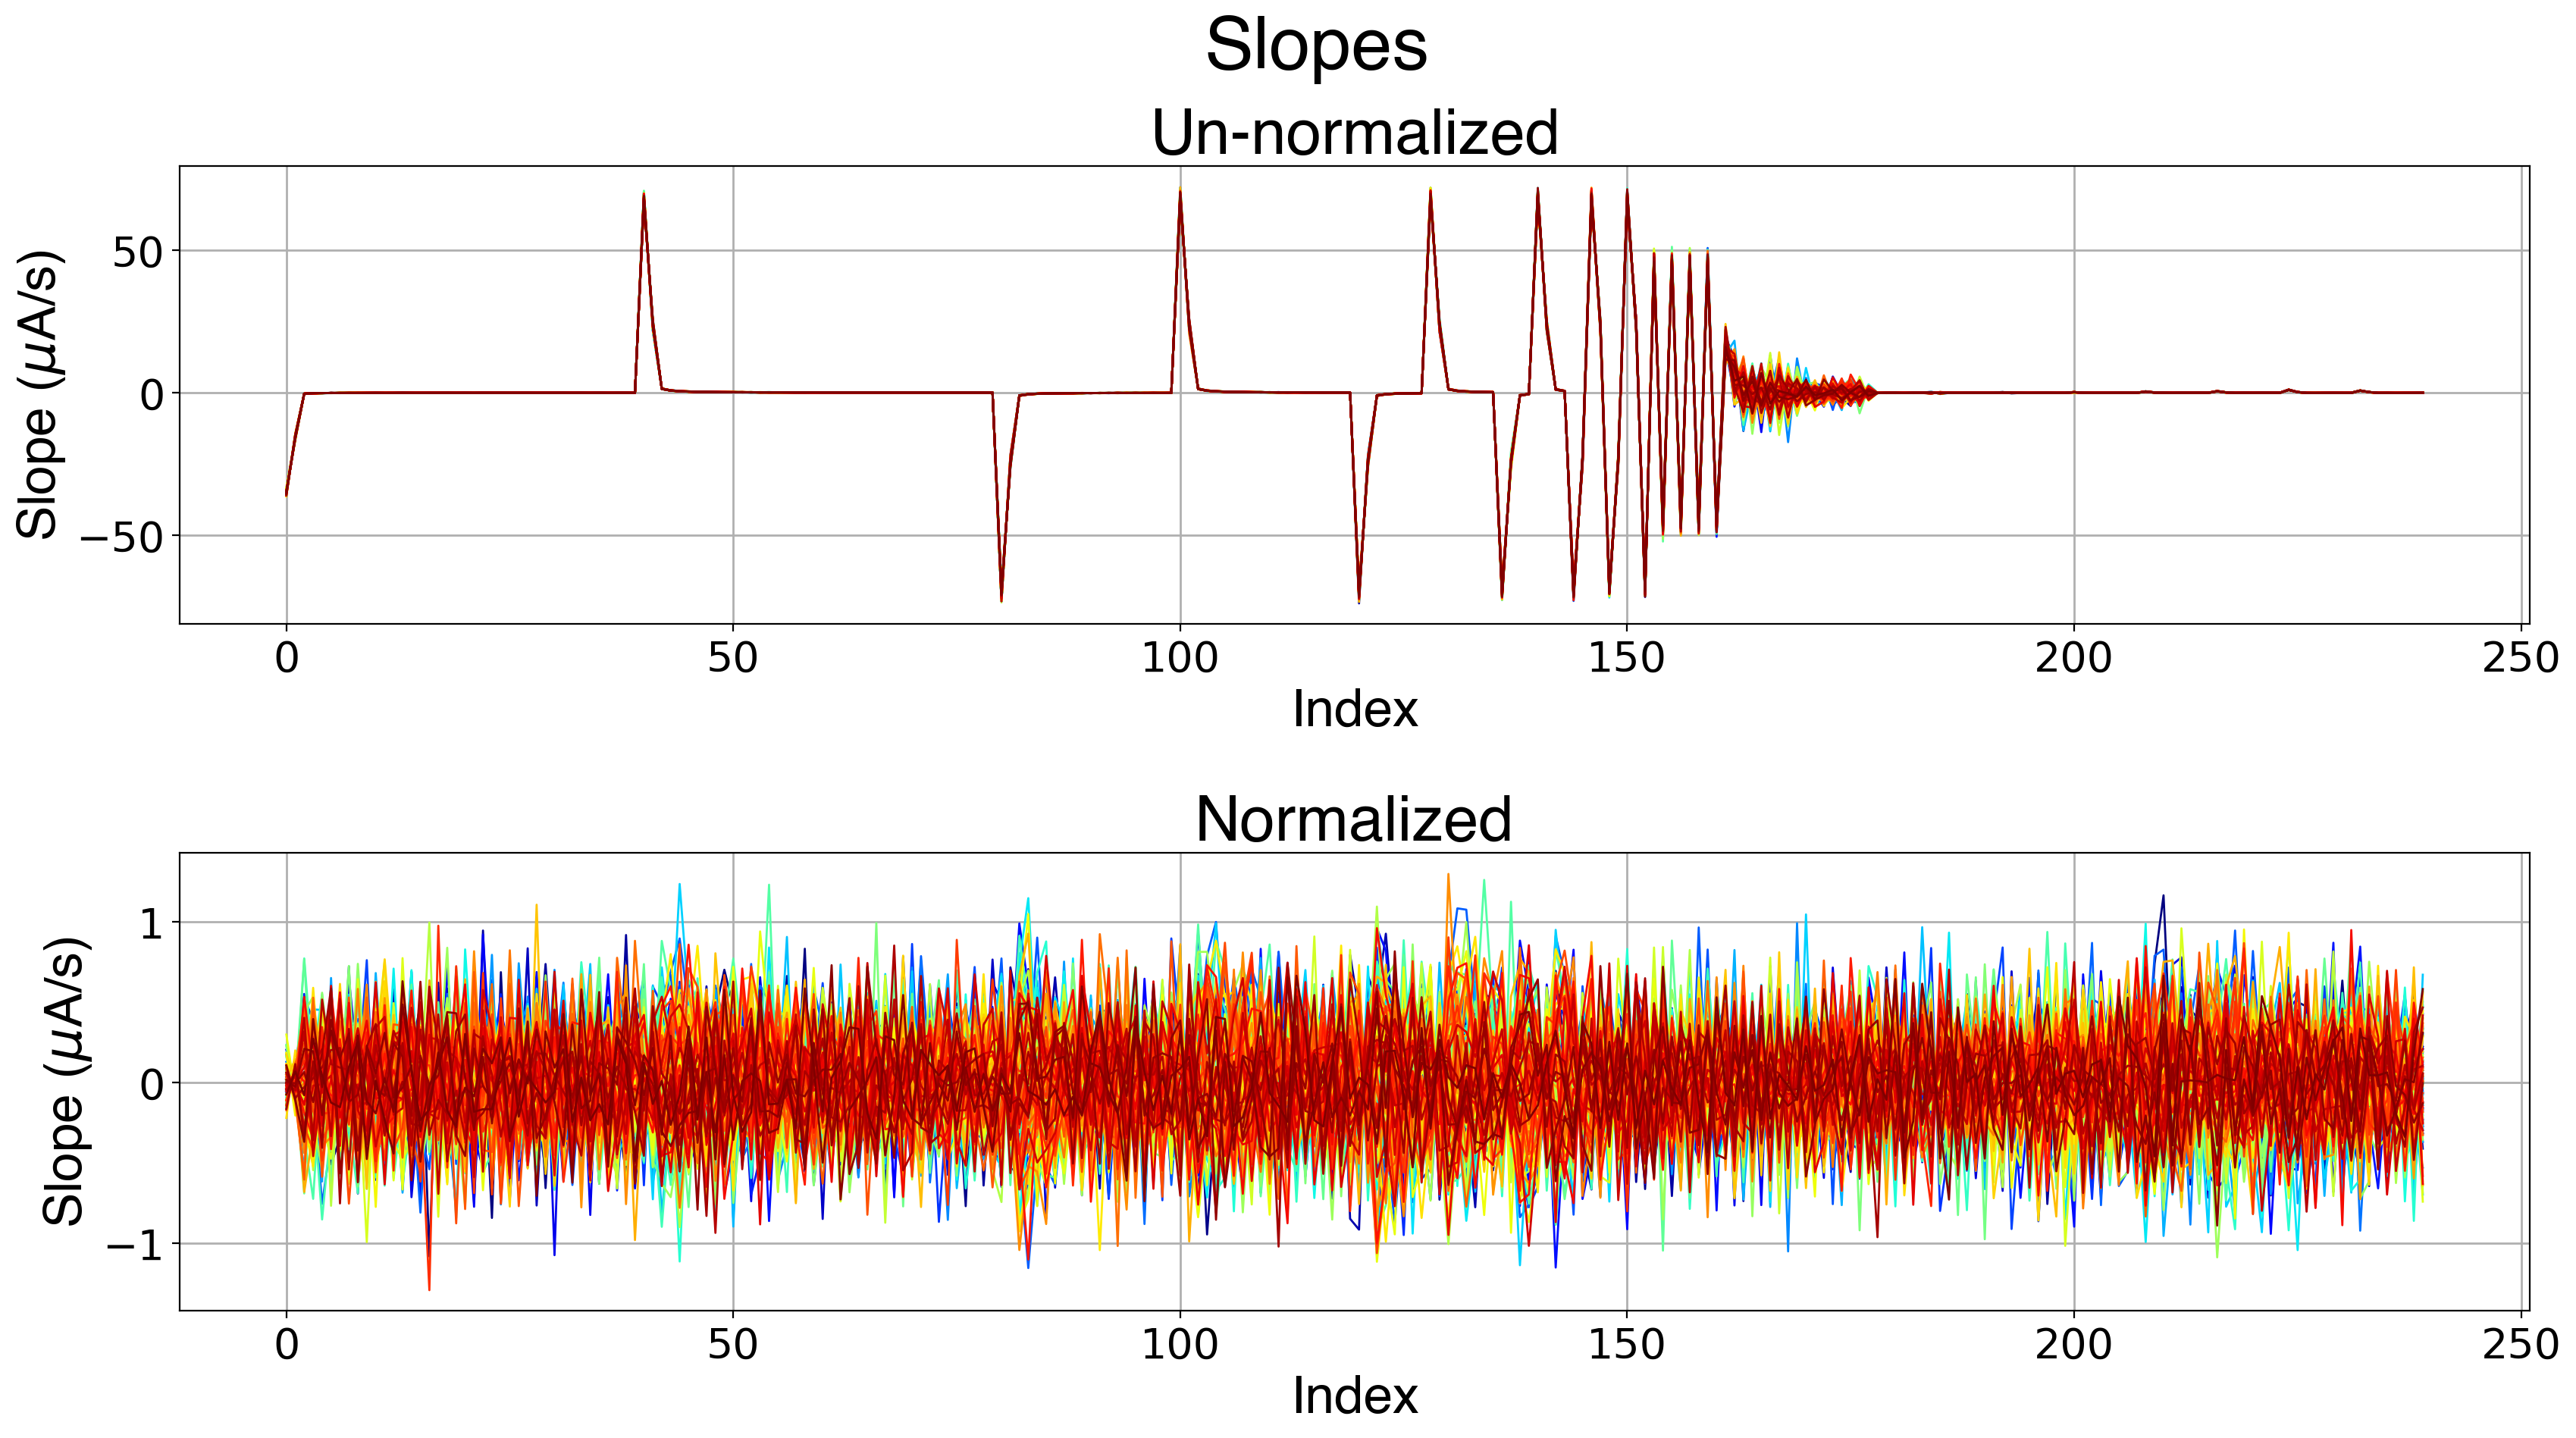

/Users/cosmo/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/cosmo/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


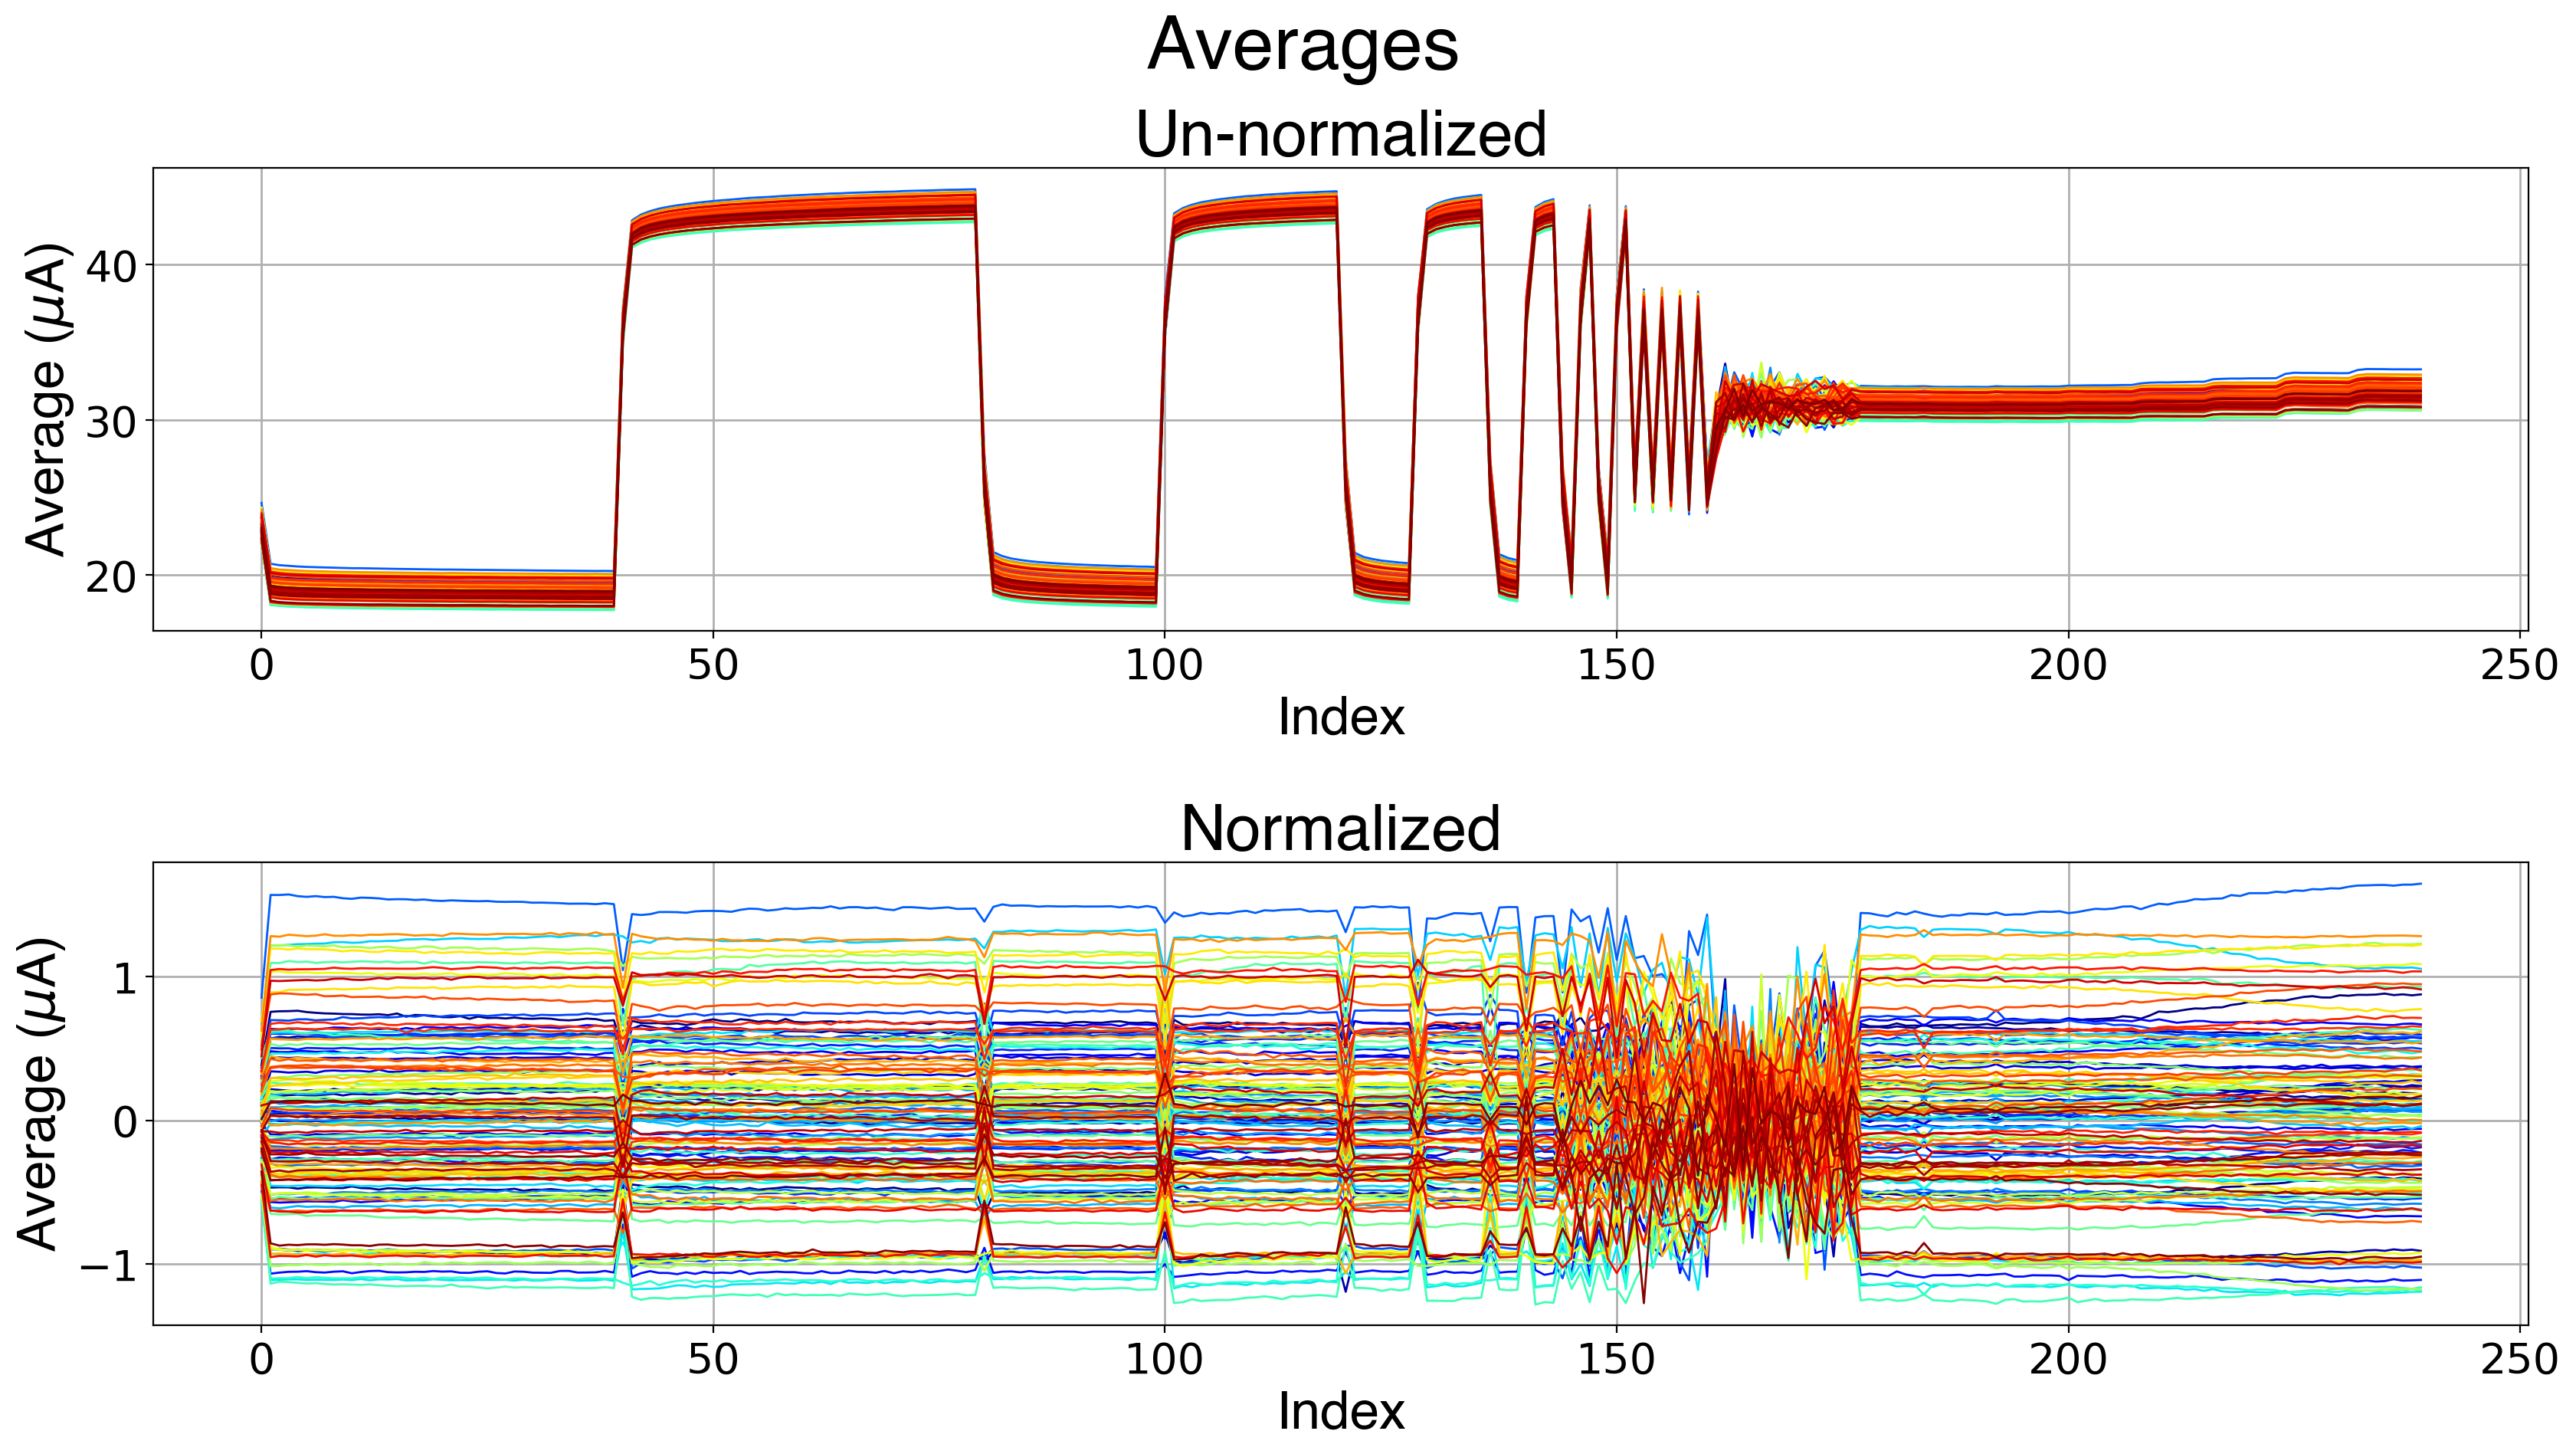

In [10]:
slopes = sensor.iloc[:,1:244]
slopes_scaled = scaled.iloc[:,1:244]

avgs = pd.concat([sensor.iloc[:, 1:4], sensor.iloc[:, 244:]], axis = 1)
avgs_scaled = pd.concat([scaled.iloc[:, 1:4], scaled.iloc[:, 244:]], axis = 1)

plot_features_subplot(slopes, slopes_scaled, 'Slopes', r'Slope ($\mu$A/s)')
plot_features_subplot(avgs, avgs_scaled, 'Averages', r'Average ($\mu$A)')

### Train/test/val split

In [11]:
# Dependent Variables - gas concentrations
y = np.asarray(scaled.iloc[:, 1:4])

# Independent variables - shape features
X = np.asarray(scaled.iloc[:, 4:])

# Train test split
X, X_val, y, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# OLS

### Fitting pipeline to training data

In [12]:
steps = [('poly', PolynomialFeatures()),
         ('linreg', LinearRegression())]

params = [{'poly__degree':list(range(1,3))}]

pipe = Pipeline(steps)

grid_search = GridSearchCV(pipe,
                           params,
                           scoring = 'neg_root_mean_squared_error',
                           return_train_score=True
                          )

# Fitting to training data (test data is implicitly inside CV search.)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

### Cross validation results 

TODO: beautify

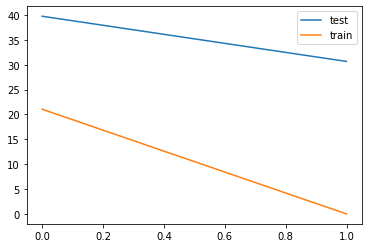

In [13]:
test_scores = grid_search.cv_results_['mean_test_score'] * - 1
train_scores = grid_search.cv_results_['mean_train_score'] * -1 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

### Predictions

-33.1462500245588
117.67691087046038


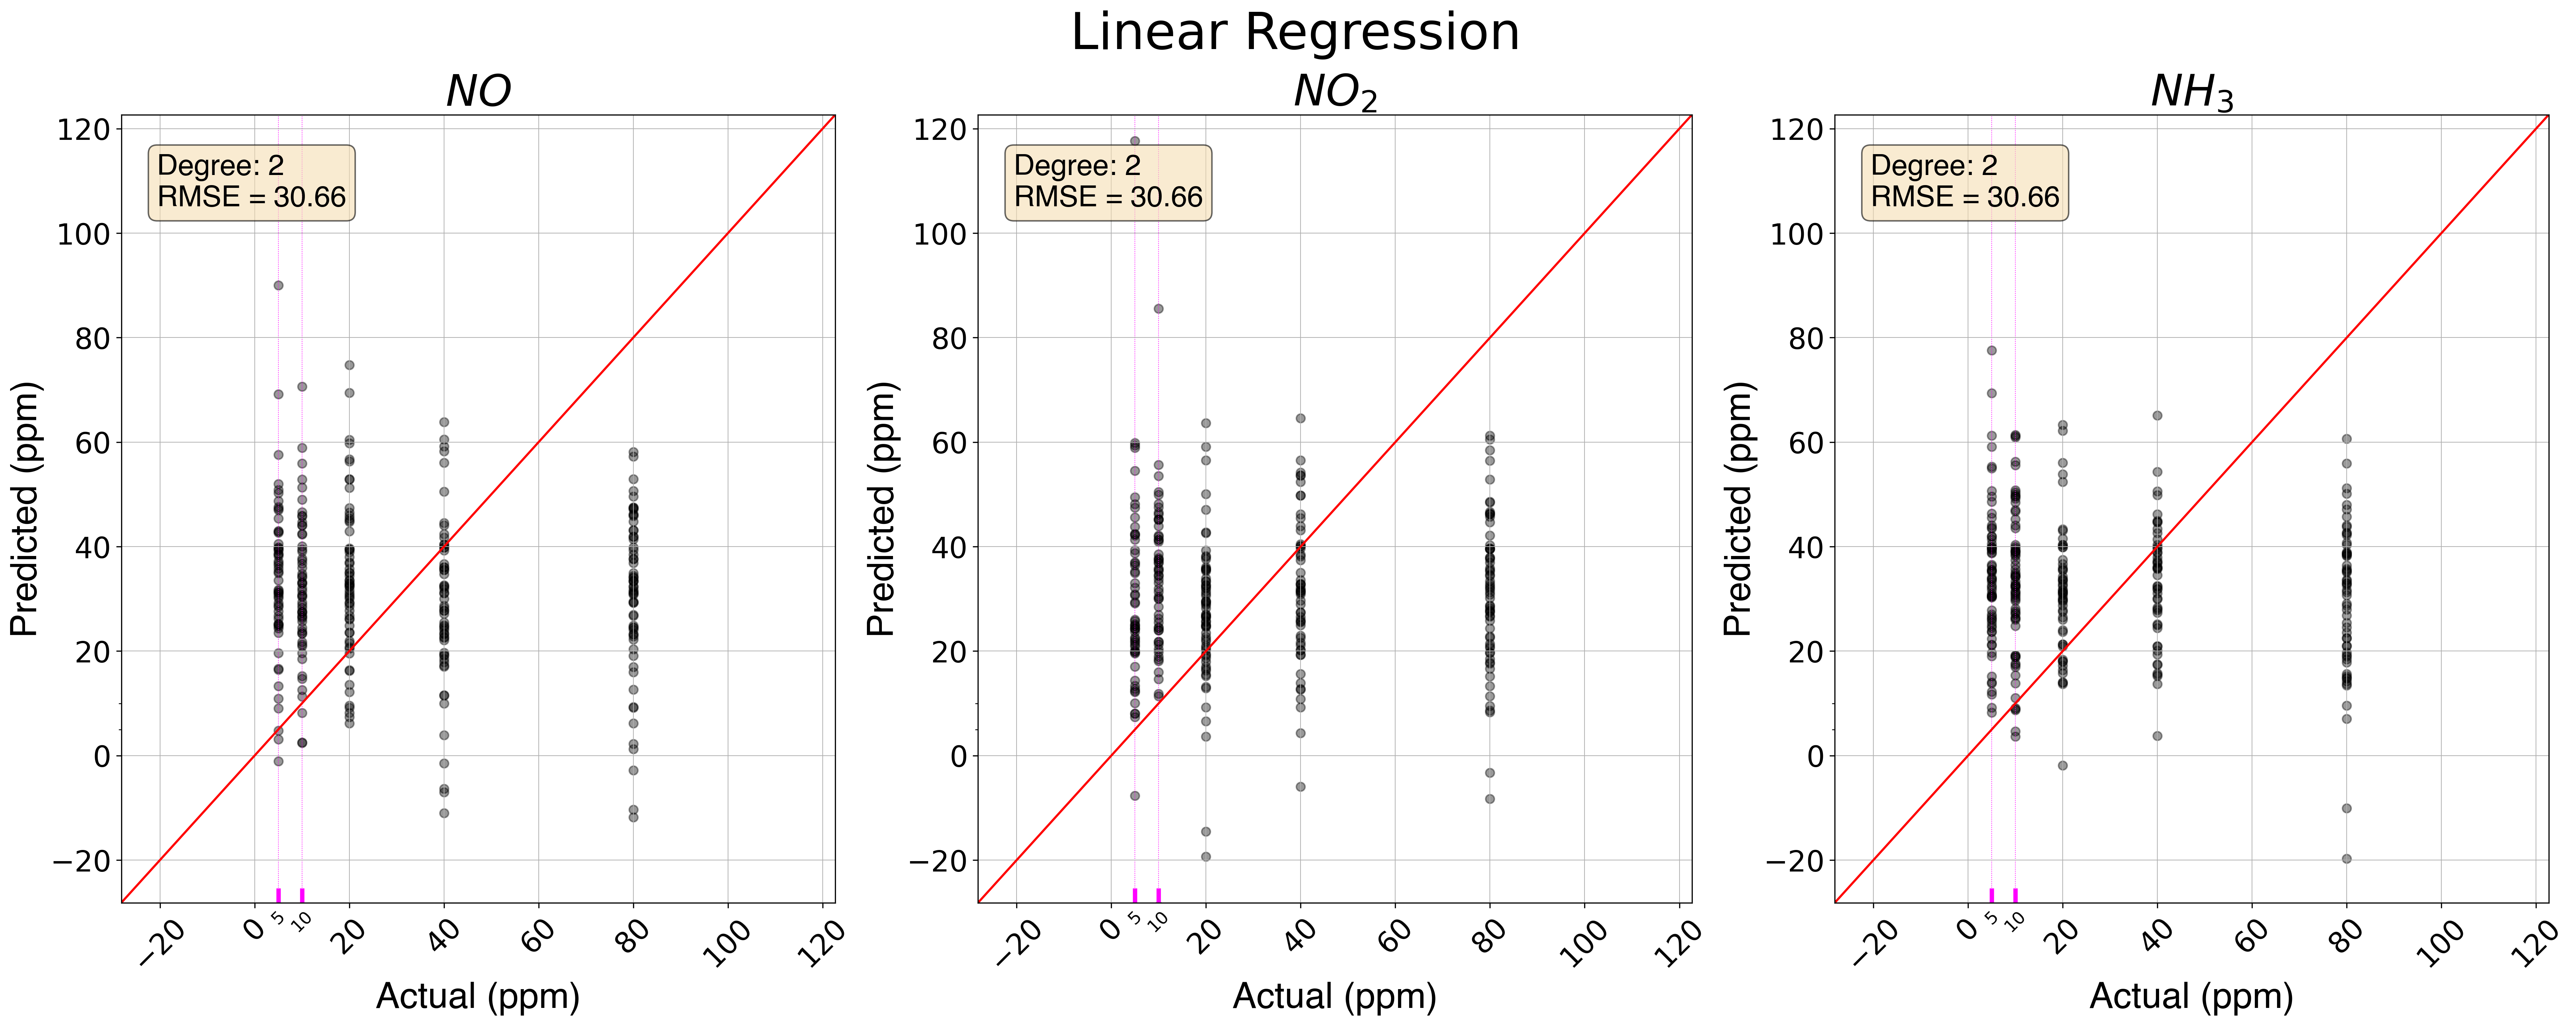

In [14]:
# Predicting on unseen validation data
y_pred = grid_search.best_estimator_.predict(X_val)

# Plotting actual vs. predicted
# Information to display
info = f"Degree: {best_params['poly__degree']}\nRMSE = {round((best_score * -1), 2)}"
plot_actual_vs_pred(y_val, y_pred, 'Linear Regression', info)    

# PCR

### Fitting pipeline to training data

In [15]:
steps = [('scaler', StandardScaler()),
         ('PCA', PCA()),
         ('linreg', LinearRegression())]

n_PC = list(range(1,200))

params = [{'PCA__n_components':n_PC}]

pipe = Pipeline(steps)

grid_search = GridSearchCV(pipe,
                           params,
                           scoring = 'neg_root_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X, y)
#pipe.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

### CV results

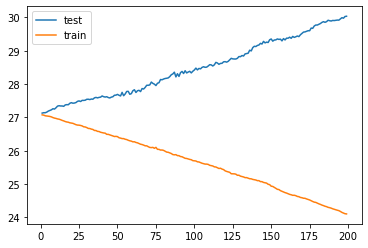

In [16]:
test_scores = -grid_search.cv_results_['mean_test_score']
train_scores = -grid_search.cv_results_['mean_train_score']

plt.plot(n_PC,test_scores, label='test')
plt.plot(n_PC,train_scores, label='train')
plt.legend(loc='best')
plt.show()

### Predictions

23.57783133852051
34.56105327406586


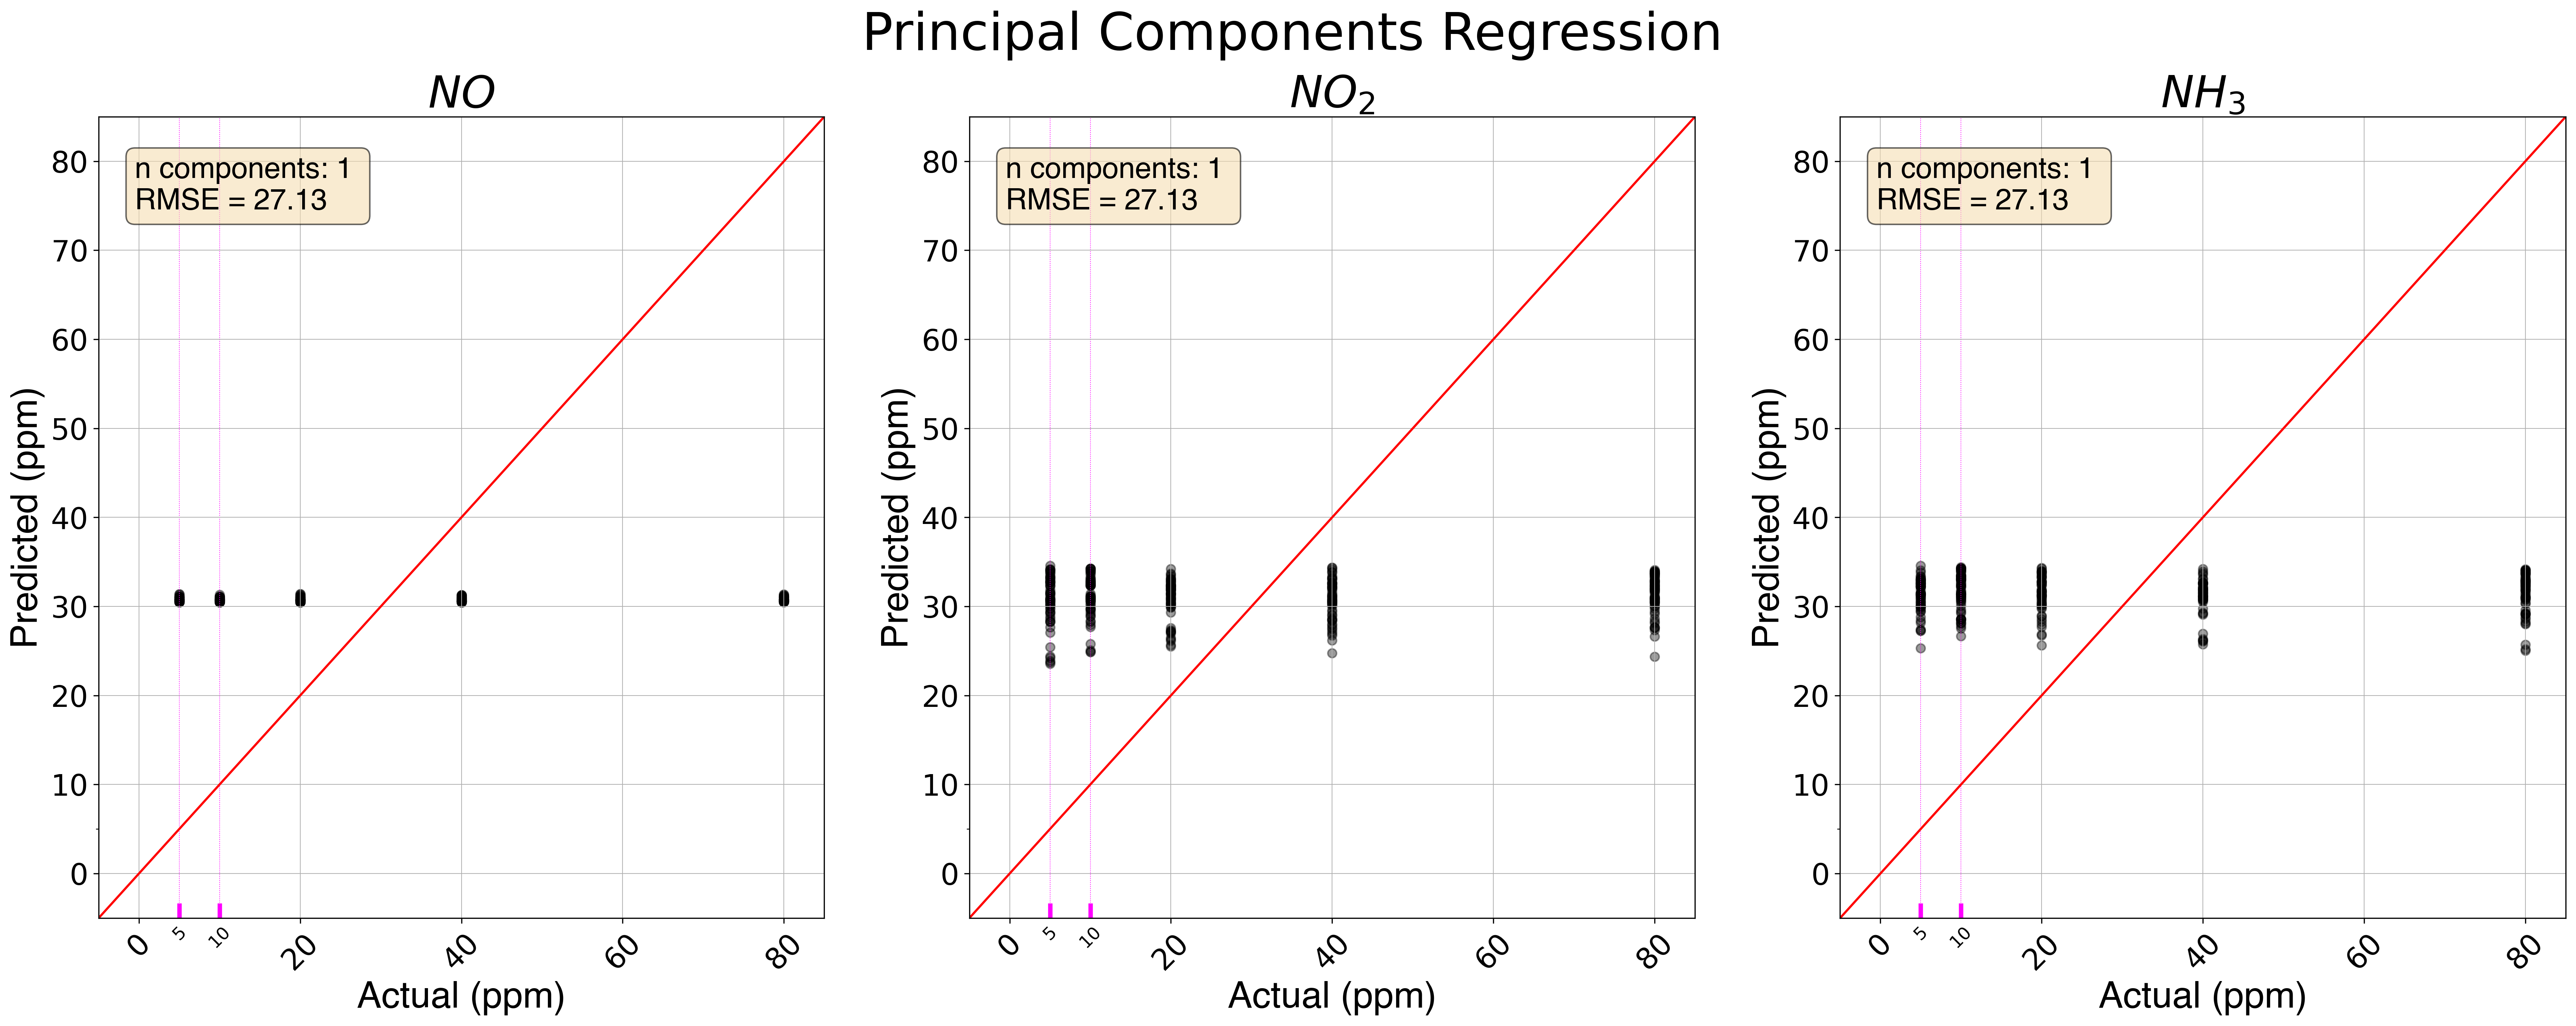

In [17]:
# Predicting on unseen validation data
y_pred = grid_search.best_estimator_.predict(X_val)

#y_pred = pipe.predict(X_val)

# Plotting actual vs. predicted
#Information to display
info = f"n components: {best_params['PCA__n_components']} \nRMSE = {round((best_score * -1), 2)}"
plot_actual_vs_pred(y_val, y_pred, 'Principal Components Regression', info)    

# PLSR

In [18]:
steps = [('PLSR', PLSRegression())]

n_comps = list(range(1,200))

params = [{'PLSR__n_components':n_comps}]

pipe = Pipeline(steps)

grid_search = GridSearchCV(pipe,
                           params,
                           scoring = 'neg_root_mean_squared_error',
                           return_train_score=True
                          )

grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

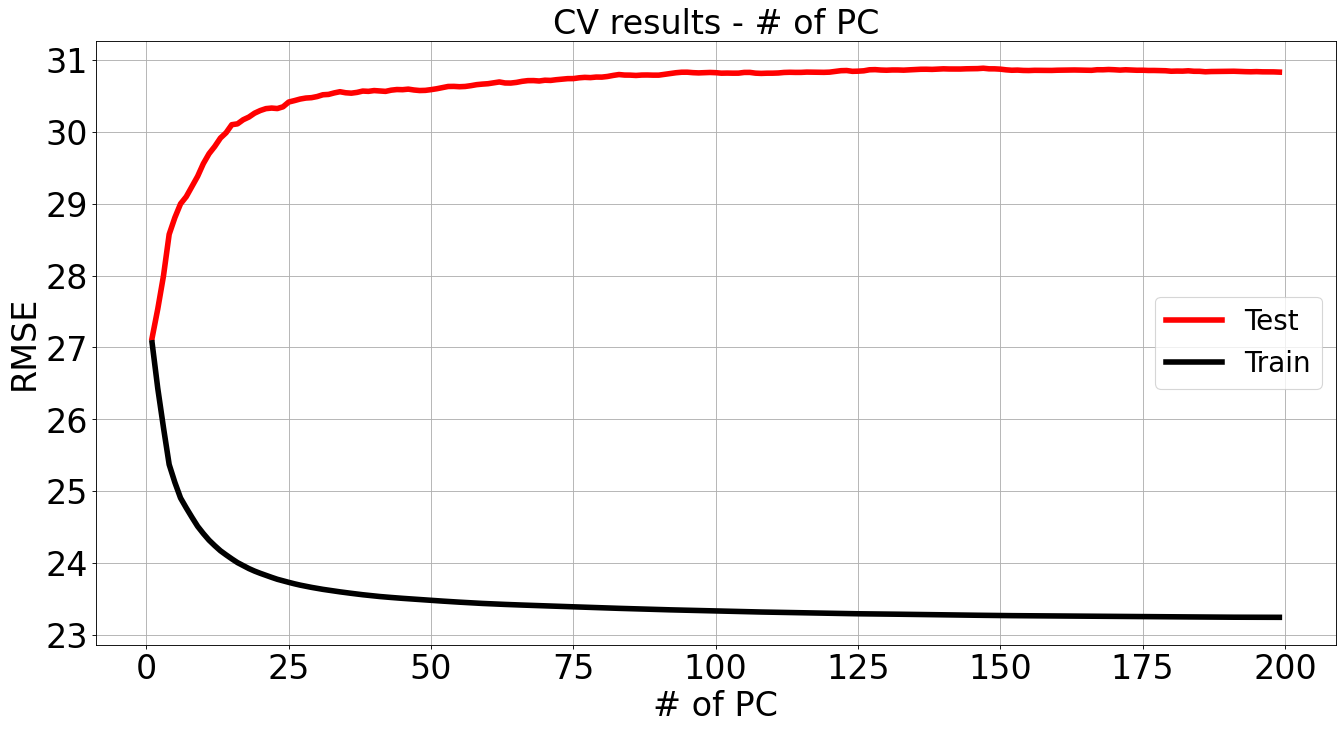

In [19]:
test_scores = -grid_search.cv_results_['mean_test_score']
train_scores = -grid_search.cv_results_['mean_train_score']

fig = plt.figure(figsize = (20,10), dpi = 80)
plt.title('CV results - # of PC', fontsize = 30)
plt.xlabel('# of PC', fontsize = 30)
plt.ylabel('RMSE', fontsize = 30)
plt.plot(n_PC,test_scores, label='Test', lw = 5, color = 'red')
plt.plot(n_PC,train_scores, label='Train', lw = 5, color = 'black')
plt.tick_params(axis='both', which='major', labelsize=30)
plt.grid()
plt.legend(loc='best', fontsize = 25)
plt.savefig('../../figures/pls-cv-exposures.png')
plt.show()

23.07521905011486
34.88340303753843


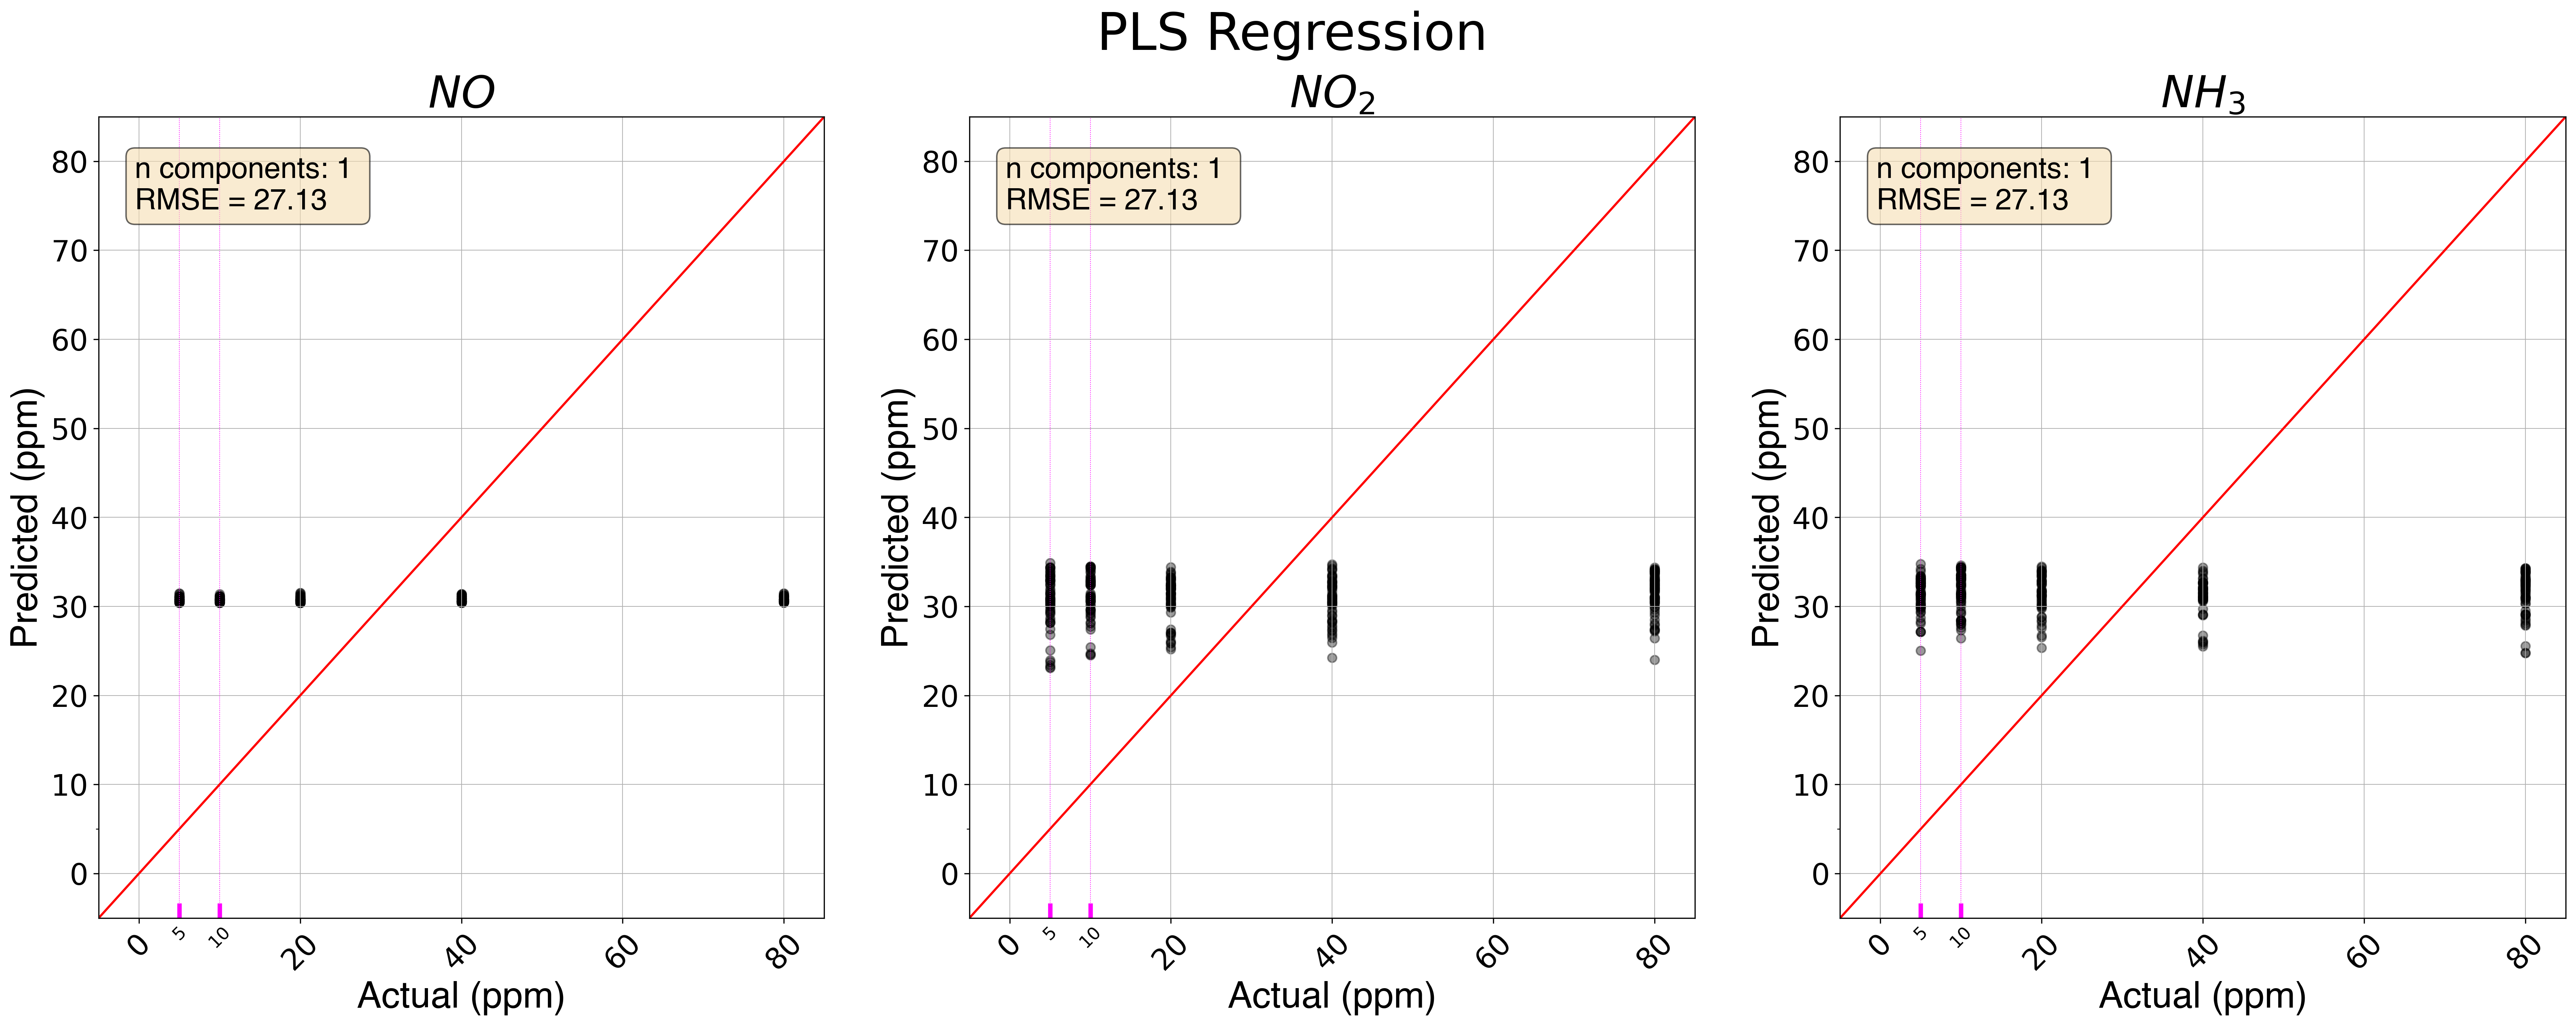

In [21]:
# Predicting on unseen validation data
y_pred = grid_search.best_estimator_.predict(X_val)


# Plotting actual vs. predicted666
#Information to display
info = f"n components: {best_params['PLSR__n_components']} \nRMSE = {round((best_score * -1), 2)}"
plot_actual_vs_pred(y_val, y_pred, 'PLS Regression', info)    

# Ridge